# Shirley Xu

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
df =pd.read_excel(io=r'../data/raw/default of credit card clients.xls')
df.drop("Unnamed: 0",axis=1)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


### As a client, what is the best way to have the minimum negative influence on your own credit depending on your own conditions? 
#####   sub questions that need to use for the research question:
1. How does the default payment influence the given credit ? goal: to know what given credit can has the least chance of getting default payment(find the correlation of these two factors by cleaning the other factors, draw a graph)
2. How does sex,education, marriage and age influence the given credit ?goal: the correlation between the client’s own condition with the given credit.(each of the factor match with the given credit,when doing so, clean the other factors,draw a graph)
3. How does sex,education, marriage and age influence the repayment status?(each of the factor match with the repayment status for each month ,when doing so, clean the other factors,draw a graph) goal: find the correlation between the client’s own condition with the status they can pay)
4. How does the amount of bill statements influence the repayment status ?(find the correlation of these two factors by cleaning the other factors, draw a graph)goal: find how can the bill payment influence the repayment status
###### revised after milestone3:
1. I should find better way of demostrate the graph about answering the questions as for this time the graph are designed easier than it should be, so it is not the best eda, and only part of the questions are answered.
2. for q2 and q3 in the sub questions, I should combine the columns together instead of working on them individually.
3. The correlation is not shown clealy due to the lack of calculation.

In [3]:
df.shape
df.head()
df.columns 

Index(['Unnamed: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23', 'Y'],
      dtype='object')

In [37]:
df.columns = df.iloc[0]
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [38]:
df1 = df.iloc[1:]
df1

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [6]:
df1.nunique(axis=0)

0
ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default payment next month        2
dtype: int64

In [7]:
df1.shape
df1.head()
df1.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object', name=0)

In [8]:
df1['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=object)

In [9]:
df1['MARRIAGE'].unique()

array([1, 2, 3, 0], dtype=object)

In [90]:
df1['SEX']=df1['SEX'].replace([1,2],['male','female'])
df1['EDUCATION']=df1['EDUCATION'].replace([0,1,2,3,4,5,6],['unknown','graduate school', 'university', 'high school', 'others', 'unknown', 'unknown'])
df1['MARRIAGE']=df1['MARRIAGE'].replace([0,1,2,3],['unknown','married', 'single', 'others'])
df1['default payment next month']=df1['default payment next month'].replace([1,0],['yes','no'])
df1['percentage0']= df1['AGE']/df1['LIMIT_BAL']
df1['percentage1']= abs(df1['PAY_0'])/df1['AGE']
df1['percentage2']=abs(df1['PAY_2'])/df1['AGE']
df1['percentage3']=abs(df1['PAY_3'])/df1['AGE']
df1['percentage4']=abs(df1['PAY_4'])/df1['AGE']
df1['percentage5']=abs(df1['PAY_5'])/df1['AGE']
df1['percentage6']=abs(df1['PAY_6'])/df1['AGE']
df1['Topay1']=abs(df1['PAY_0'])*df1['BILL_AMT1']
df1['Topay2']=abs(df1['PAY_2'])*df1['BILL_AMT2']
df1['Topay3']=abs(df1['PAY_3'])*df1['BILL_AMT3']
df1['Topay4']=abs(df1['PAY_4'])*df1['BILL_AMT4']
df1['Topay5']=abs(df1['PAY_5'])*df1['BILL_AMT5']
df1['Topay6']=abs(df1['PAY_6'])*df1['BILL_AMT6']
df1

/var/folders/dn/72_z_r3s4cj2bmw_khx5xymr0000gn/T/ipykernel_15086/3597417806.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['SEX']=df1['SEX'].replace([1,2],['male','female'])
/var/folders/dn/72_z_r3s4cj2bmw_khx5xymr0000gn/T/ipykernel_15086/3597417806.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['EDUCATION']=df1['EDUCATION'].replace([0,1,2,3,4,5,6],['unknown','graduate school', 'university', 'high school', 'others', 'unknown', 'unknown'])
/var/folders/dn/72_z_r3s4cj2bmw_khx5xymr0000gn/T/ip

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,percentage3,percentage4,percentage5,percentage6,Topay1,Topay2,Topay3,Topay4,Topay5,Topay6
1,1,20000,female,university,married,24,2,2,-1,-1,...,0.041667,0.041667,0.083333,0.083333,7826,6204,689,0,0,0
2,2,120000,female,university,single,26,-1,2,0,0,...,0.0,0.0,0.0,0.076923,2682,3450,0,0,0,6522
3,3,90000,female,university,single,34,0,0,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
4,4,50000,female,university,married,37,0,0,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
5,5,50000,male,university,married,57,-1,0,-1,0,...,0.017544,0.0,0.0,0.0,8617,0,35835,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,29996,220000,male,high school,married,39,0,0,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
29997,29997,150000,male,high school,single,43,-1,-1,-1,-1,...,0.023256,0.023256,0.0,0.0,1683,1828,3502,8979,0,0
29998,29998,30000,male,university,single,37,4,3,2,-1,...,0.054054,0.027027,0.0,0.0,14260,10068,5516,20878,0,0
29999,29999,80000,male,high school,married,41,1,-1,0,0,...,0.0,0.0,0.0,0.02439,-1645,78379,0,0,0,48944


In [91]:
df1.dropna(axis=0)
df1
df1.to_csv("../data/processed/processed_data_Shirley/dataset2.csv")

In [12]:
df1.describe(exclude=[np.number]).T

,count,unique,top,freq
0,,,,
ID,30000,30000,1,1
LIMIT_BAL,30000,81,50000,3365
SEX,30000,2,female,18112
EDUCATION,30000,5,university,14030
MARRIAGE,30000,4,single,15964
AGE,30000,56,29,1605
PAY_0,30000,11,0,14737
PAY_2,30000,11,0,15730
PAY_3,30000,11,0,15764


In [17]:
df2=df1.drop(columns = ['ID','SEX', 'EDUCATION', 'MARRIAGE',  'AGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6'])
df2

,LIMIT_BAL,default payment next month
1,20000,yes
2,120000,yes
3,90000,no
4,50000,no
5,50000,no
...,...,...
29996,220000,no
29997,150000,no
29998,30000,yes
29999,80000,yes


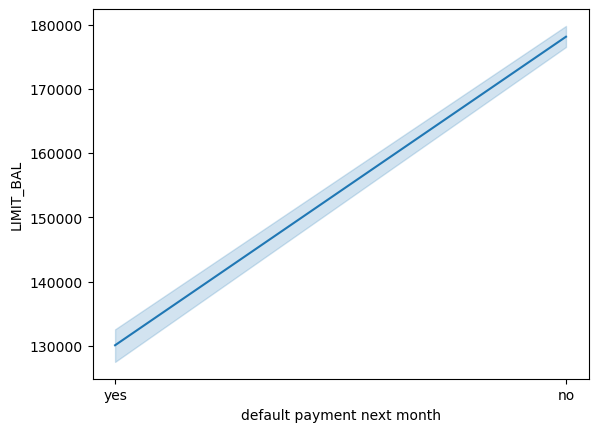

In [14]:
fig1=sns.lineplot(x=df1["default payment next month"],y=df1["LIMIT_BAL"])

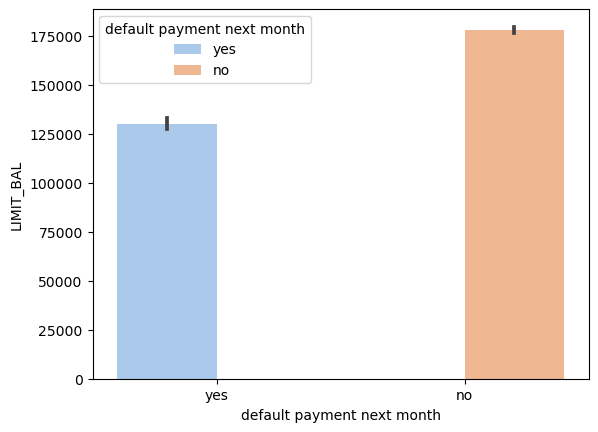

In [51]:
fig2=sns.barplot(x=df1["default payment next month"],y=df1["LIMIT_BAL"],hue=df1["default payment next month"],palette="pastel")

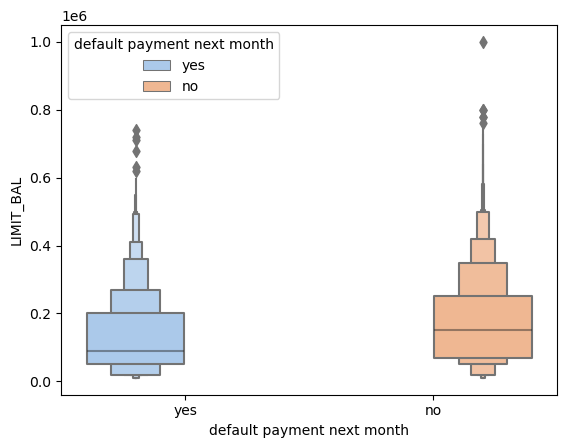

In [52]:
fig3= sns.boxenplot(x=df1["default payment next month"],y=df1["LIMIT_BAL"],hue=df1["default payment next month"],palette="pastel")

<AxesSubplot:xlabel='default payment next month', ylabel='LIMIT_BAL'>

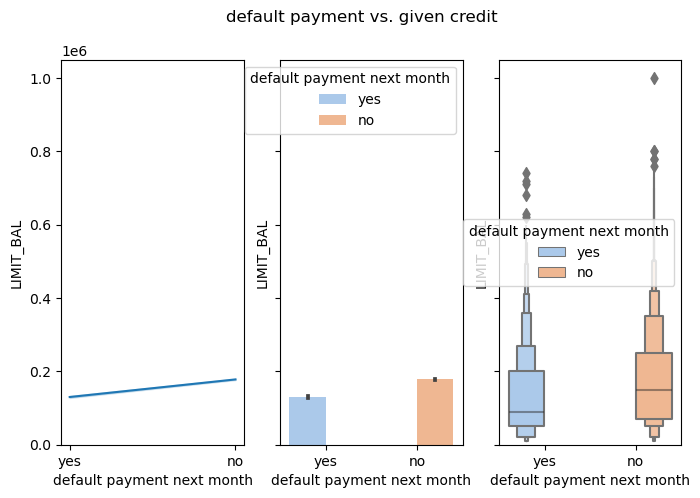

In [39]:
fig, axes = plt.subplots(1, 3, figsize=(8, 5), sharey=True)
fig.suptitle('default payment vs. given credit')
plt.subplot(1,3,1)
sns.lineplot(x=df1["default payment next month"],y=df1["LIMIT_BAL"])
plt.subplot(1,3,2)
sns.barplot(x=df1["default payment next month"],y=df1["LIMIT_BAL"],hue=df1["default payment next month"],palette="pastel")
plt.subplot(1,3,3)
sns.boxenplot(x=df1["default payment next month"],y=df1["LIMIT_BAL"],hue=df1["default payment next month"],palette="pastel")

In [14]:
df3=df1.drop(columns = ['ID', 'EDUCATION', 'MARRIAGE',  'AGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','default payment next month'])
df3

,LIMIT_BAL,SEX
1,20000,female
2,120000,female
3,90000,female
4,50000,female
5,50000,male
...,...,...
29996,220000,male
29997,150000,male
29998,30000,male
29999,80000,male


<AxesSubplot:xlabel='SEX', ylabel='LIMIT_BAL'>

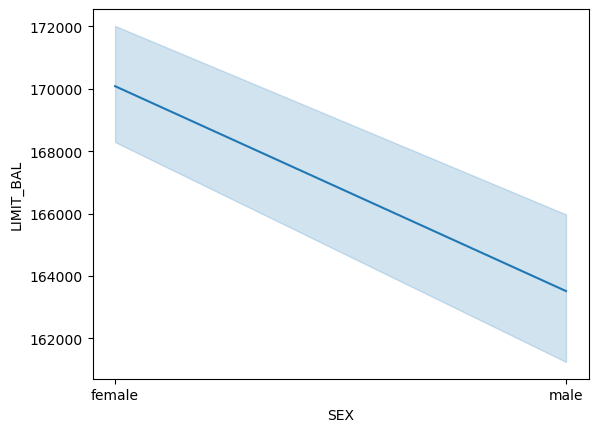

In [16]:
fig4=sns.lineplot(x=df1["SEX"],y=df1["LIMIT_BAL"])

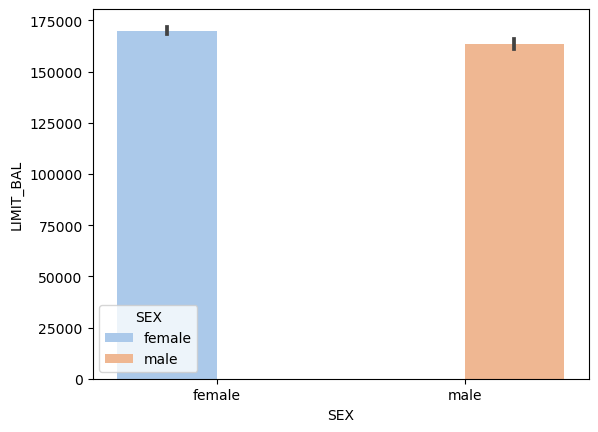

In [101]:
fig5=sns.barplot(x=df1["SEX"],y=df1["LIMIT_BAL"],hue=df1["SEX"],palette="pastel")

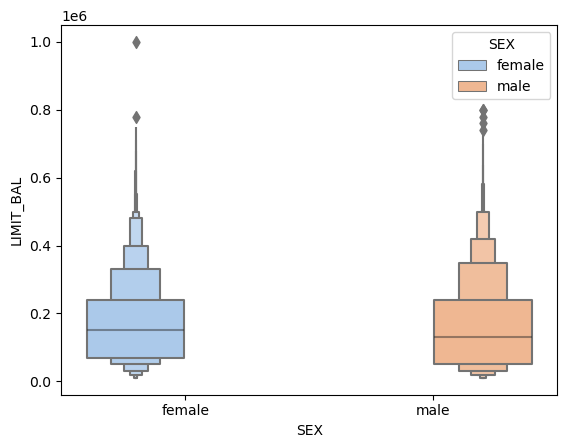

In [102]:
fig6=sns.boxenplot(x=df1["SEX"],y=df1["LIMIT_BAL"],hue=df1["SEX"],palette="pastel")

<AxesSubplot:xlabel='SEX', ylabel='LIMIT_BAL'>

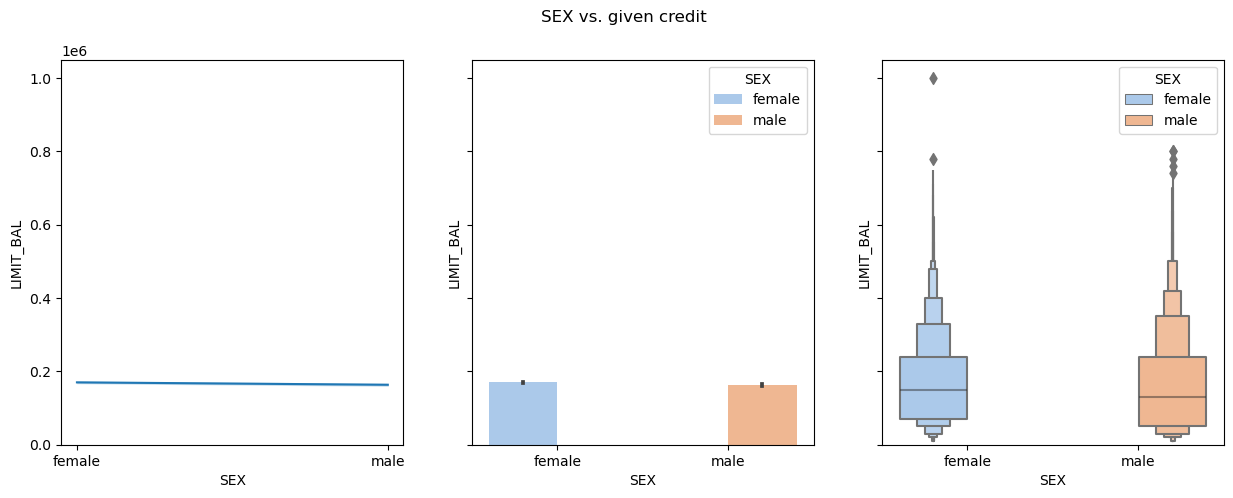

In [99]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('SEX vs. given credit')
plt.subplot(1,3,1)
sns.lineplot(x=df1["SEX"],y=df1["LIMIT_BAL"])
plt.subplot(1,3,2)
sns.barplot(x=df1["SEX"],y=df1["LIMIT_BAL"],hue=df1["SEX"],palette="pastel")
plt.subplot(1,3,3)
sns.boxenplot(x=df1["SEX"],y=df1["LIMIT_BAL"],hue=df1["SEX"],palette="pastel")

In [24]:
df4=df1.drop(columns = ['ID', 'SEX', 'MARRIAGE',  'AGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','default payment next month'])
df4

,LIMIT_BAL,EDUCATION
1,20000,university
2,120000,university
3,90000,university
4,50000,university
5,50000,university
...,...,...
29996,220000,high school
29997,150000,high school
29998,30000,university
29999,80000,high school


<AxesSubplot:xlabel='EDUCATION', ylabel='LIMIT_BAL'>

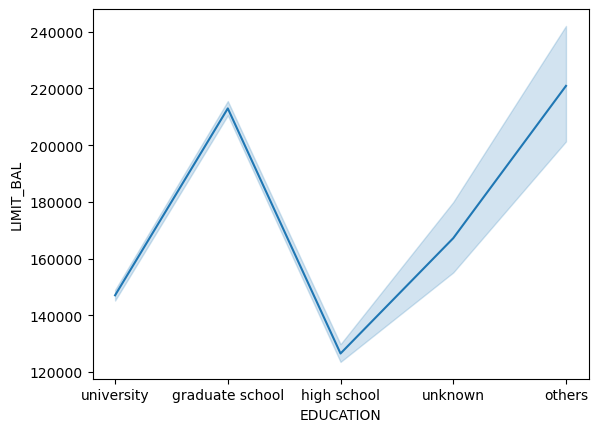

In [25]:
sns.lineplot(x=df1["EDUCATION"],y=df1["LIMIT_BAL"])

<AxesSubplot:xlabel='EDUCATION', ylabel='LIMIT_BAL'>

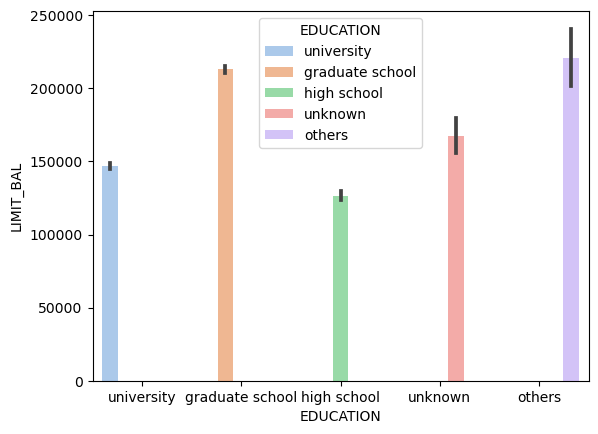

In [103]:
sns.barplot(x=df1["EDUCATION"],y=df1["LIMIT_BAL"],hue=df1["EDUCATION"],palette="pastel")

<AxesSubplot:xlabel='EDUCATION', ylabel='LIMIT_BAL'>

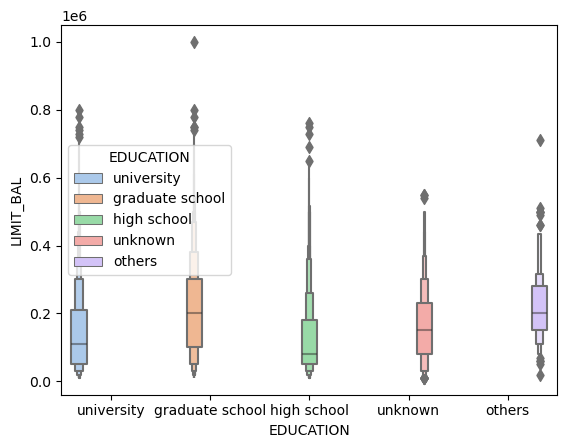

In [104]:
sns.boxenplot(x=df1["EDUCATION"],y=df1["LIMIT_BAL"],hue=df1["EDUCATION"],palette="pastel")

<AxesSubplot:xlabel='EDUCATION', ylabel='LIMIT_BAL'>

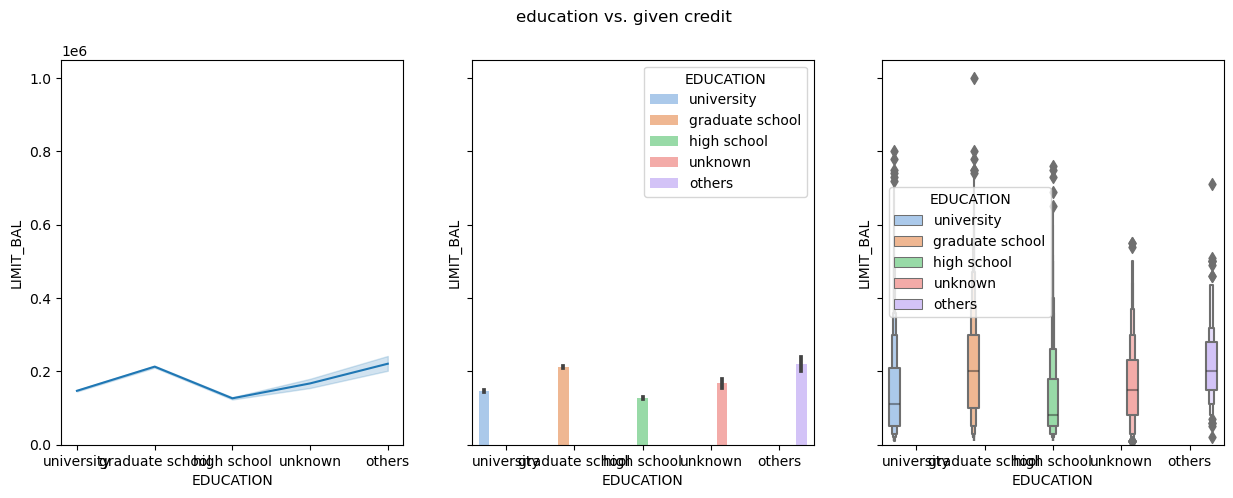

In [100]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('education vs. given credit')
plt.subplot(1,3,1)
sns.lineplot(x=df1["EDUCATION"],y=df1["LIMIT_BAL"])
plt.subplot(1,3,2)
sns.barplot(x=df1["EDUCATION"],y=df1["LIMIT_BAL"],hue=df1["EDUCATION"],palette="pastel")
plt.subplot(1,3,3)
sns.boxenplot(x=df1["EDUCATION"],y=df1["LIMIT_BAL"],hue=df1["EDUCATION"],palette="pastel")

In [32]:
df5=df1.drop(columns = ['ID', 'SEX','EDUCATION', 'AGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','default payment next month'])
df5

,LIMIT_BAL,MARRIAGE
1,20000,married
2,120000,single
3,90000,single
4,50000,married
5,50000,married
...,...,...
29996,220000,married
29997,150000,single
29998,30000,single
29999,80000,married


<AxesSubplot:xlabel='MARRIAGE', ylabel='LIMIT_BAL'>

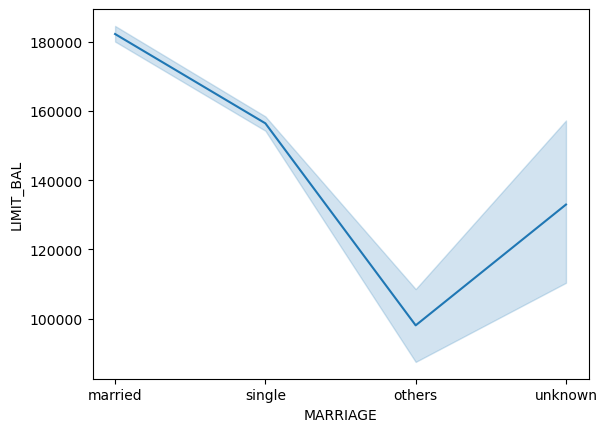

In [33]:
sns.lineplot(x=df1["MARRIAGE"],y=df1["LIMIT_BAL"])

<AxesSubplot:xlabel='MARRIAGE', ylabel='LIMIT_BAL'>

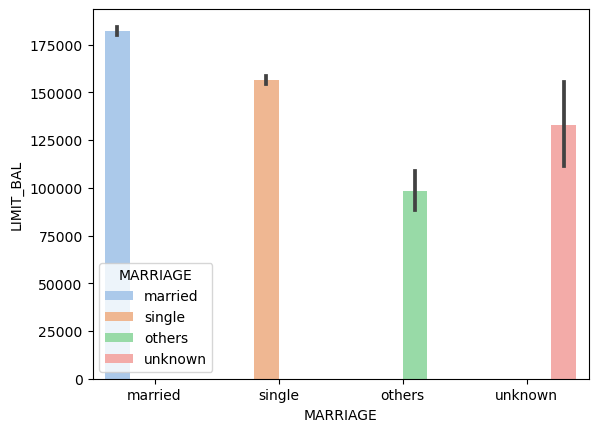

In [105]:
sns.barplot(x=df1["MARRIAGE"],y=df1["LIMIT_BAL"],hue=df1["MARRIAGE"],palette="pastel")

<AxesSubplot:xlabel='MARRIAGE', ylabel='LIMIT_BAL'>

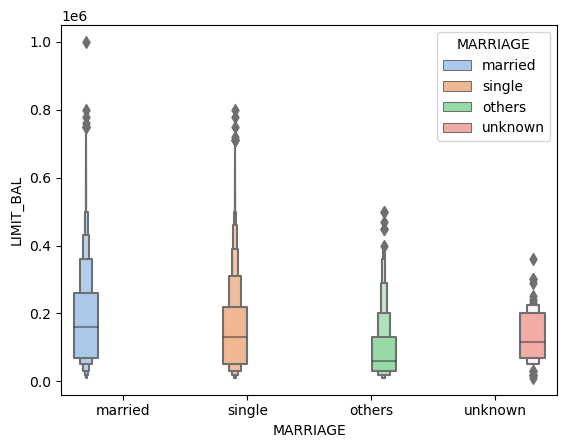

In [106]:
sns.boxenplot(x=df1["MARRIAGE"],y=df1["LIMIT_BAL"],hue=df1["MARRIAGE"],palette="pastel")

<AxesSubplot:xlabel='MARRIAGE', ylabel='LIMIT_BAL'>

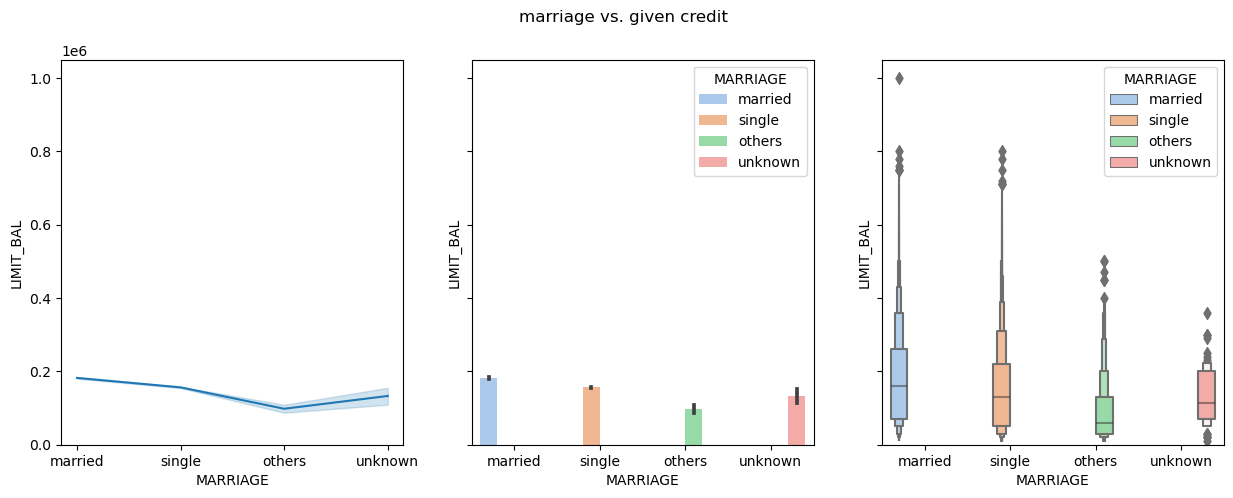

In [107]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('marriage vs. given credit')
plt.subplot(1,3,1)
sns.lineplot(x=df1["MARRIAGE"],y=df1["LIMIT_BAL"])
plt.subplot(1,3,2)
sns.barplot(x=df1["MARRIAGE"],y=df1["LIMIT_BAL"],hue=df1["MARRIAGE"],palette="pastel")
plt.subplot(1,3,3)
sns.boxenplot(x=df1["MARRIAGE"],y=df1["LIMIT_BAL"],hue=df1["MARRIAGE"],palette="pastel")

In [86]:
df6=df1.drop(columns = ['ID', 'SEX','EDUCATION', 'MARRIAGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','default payment next month'])
df6

,LIMIT_BAL,AGE
1,20000,24
2,120000,26
3,90000,34
4,50000,37
5,50000,57
...,...,...
29996,220000,39
29997,150000,43
29998,30000,37
29999,80000,41


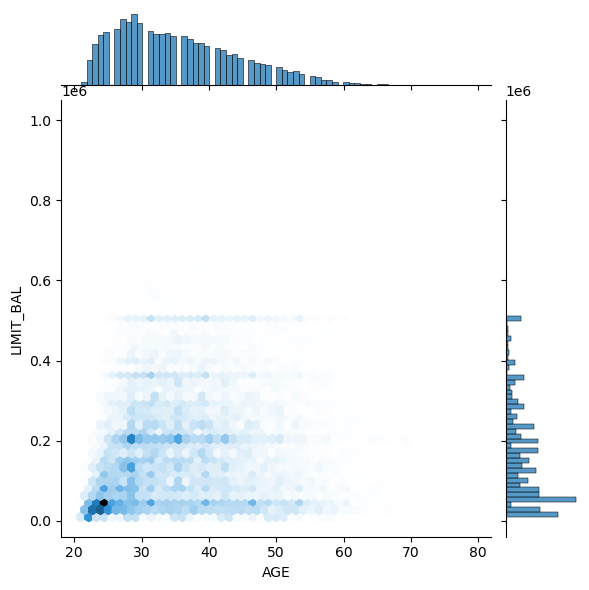

In [95]:
sns.jointplot(x=df1["AGE"],y=df1["LIMIT_BAL"],kind="hex")

<AxesSubplot:xlabel='AGE', ylabel='LIMIT_BAL'>

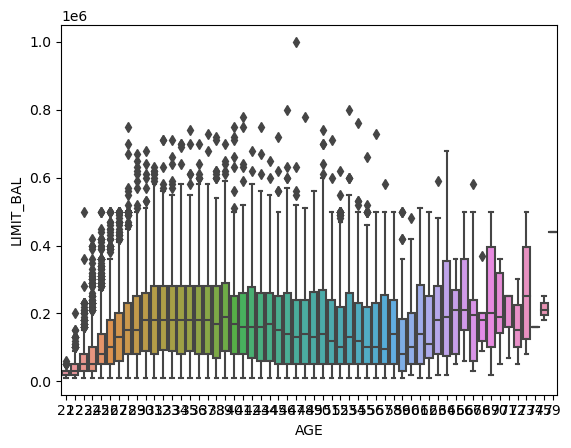

In [122]:
sns.boxplot(x=df1["AGE"],y=df1["LIMIT_BAL"])

<AxesSubplot:xlabel='AGE', ylabel='LIMIT_BAL'>

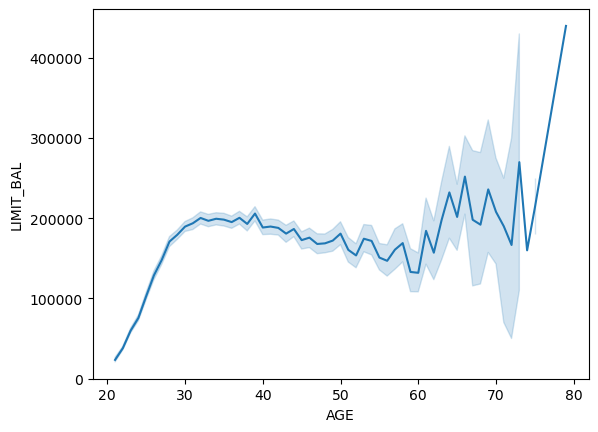

In [110]:
sns.lineplot(x=df1["AGE"],y=df1["LIMIT_BAL"])

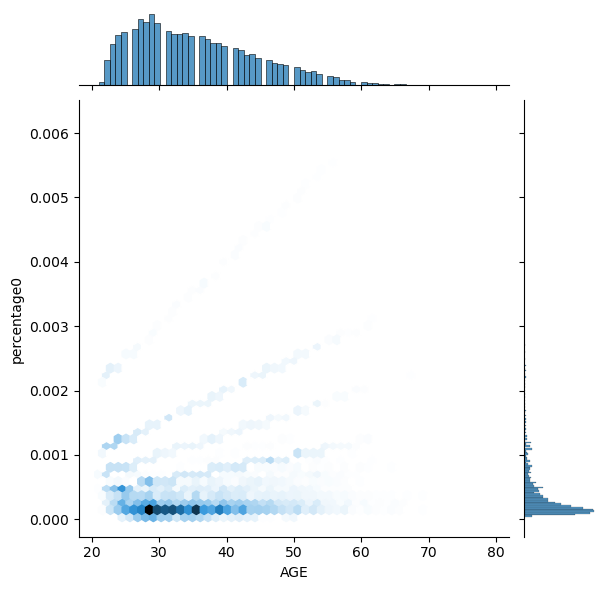

In [80]:
sns.jointplot(x=df1["AGE"],y=df1["percentage0"],kind="hex")

<AxesSubplot:xlabel='AGE', ylabel='percentage0'>

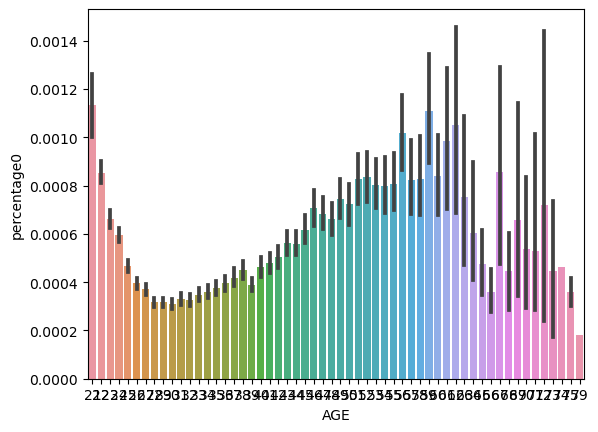

In [81]:
sns.barplot(x=df1["AGE"],y=df1["percentage0"])

<AxesSubplot:xlabel='AGE', ylabel='percentage0'>

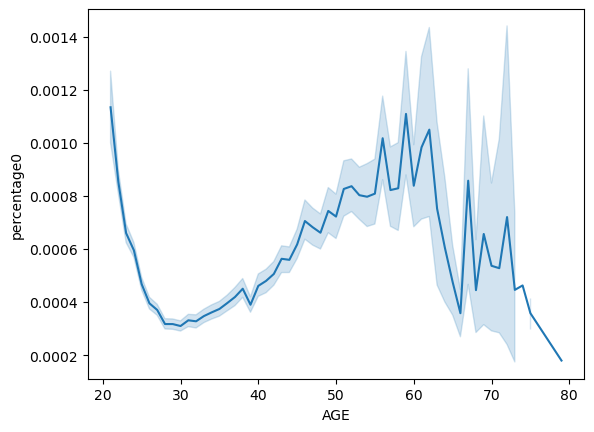

In [82]:
sns.lineplot(x=df1["AGE"],y=df1["percentage0"])

In [15]:
df7=df1.drop(columns = ['ID', 'EDUCATION', 'MARRIAGE',  'AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','default payment next month'])
df7

,LIMIT_BAL,SEX,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
1,20000,female,2,2,-1,-1,-2,-2
2,120000,female,-1,2,0,0,0,2
3,90000,female,0,0,0,0,0,0
4,50000,female,0,0,0,0,0,0
5,50000,male,-1,0,-1,0,0,0
...,...,...,...,...,...,...,...,...
29996,220000,male,0,0,0,0,0,0
29997,150000,male,-1,-1,-1,-1,0,0
29998,30000,male,4,3,2,-1,0,0
29999,80000,male,1,-1,0,0,0,-1


<AxesSubplot:xlabel='SEX', ylabel='PAY_6'>

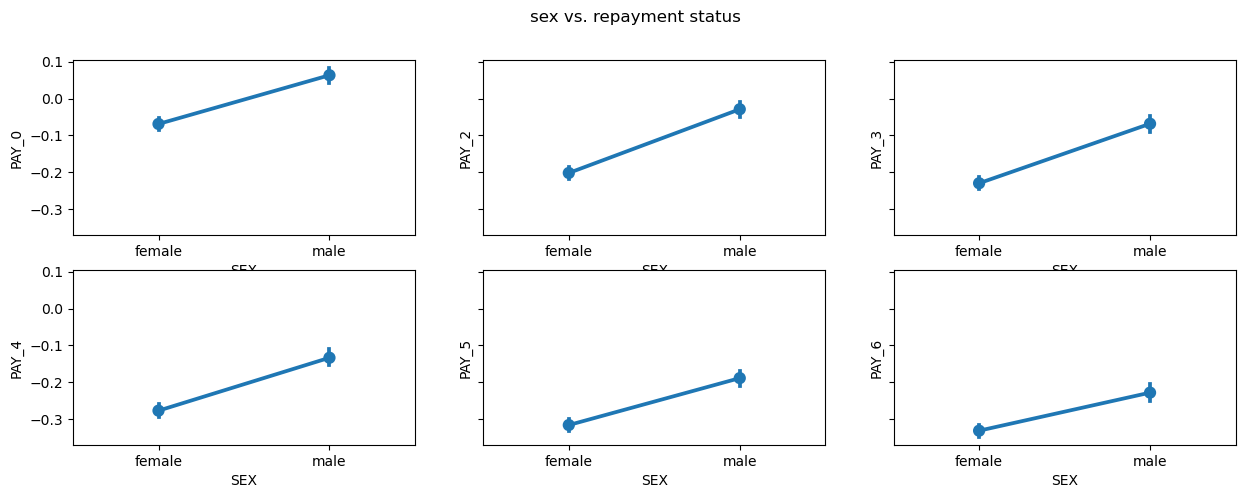

In [41]:
fig, axes = plt.subplots(2, 3, figsize=(15, 5), sharey=True)
fig.suptitle('sex vs. repayment status')
plt.subplot(2,3,1)
sns.pointplot(x=df1["SEX"],y=df1["PAY_0"])
plt.subplot(2,3,2)
sns.pointplot(x=df1["SEX"],y=df1["PAY_2"])
plt.subplot(2,3,3)
sns.pointplot(x=df1["SEX"],y=df1["PAY_3"])
plt.subplot(2,3,4)
sns.pointplot(x=df1["SEX"],y=df1["PAY_4"])
plt.subplot(2,3,5)
sns.pointplot(x=df1["SEX"],y=df1["PAY_5"])
plt.subplot(2,3,6)
sns.pointplot(x=df1["SEX"],y=df1["PAY_6"])

In [98]:
df8=df1.drop(columns = ['ID', 'SEX', 'MARRIAGE',  'AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','default payment next month'])
df8

,LIMIT_BAL,EDUCATION,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
1,20000,university,2,2,-1,-1,-2,-2
2,120000,university,-1,2,0,0,0,2
3,90000,university,0,0,0,0,0,0
4,50000,university,0,0,0,0,0,0
5,50000,university,-1,0,-1,0,0,0
...,...,...,...,...,...,...,...,...
29996,220000,high school,0,0,0,0,0,0
29997,150000,high school,-1,-1,-1,-1,0,0
29998,30000,university,4,3,2,-1,0,0
29999,80000,high school,1,-1,0,0,0,-1


<AxesSubplot:xlabel='EDUCATION', ylabel='PAY_6'>

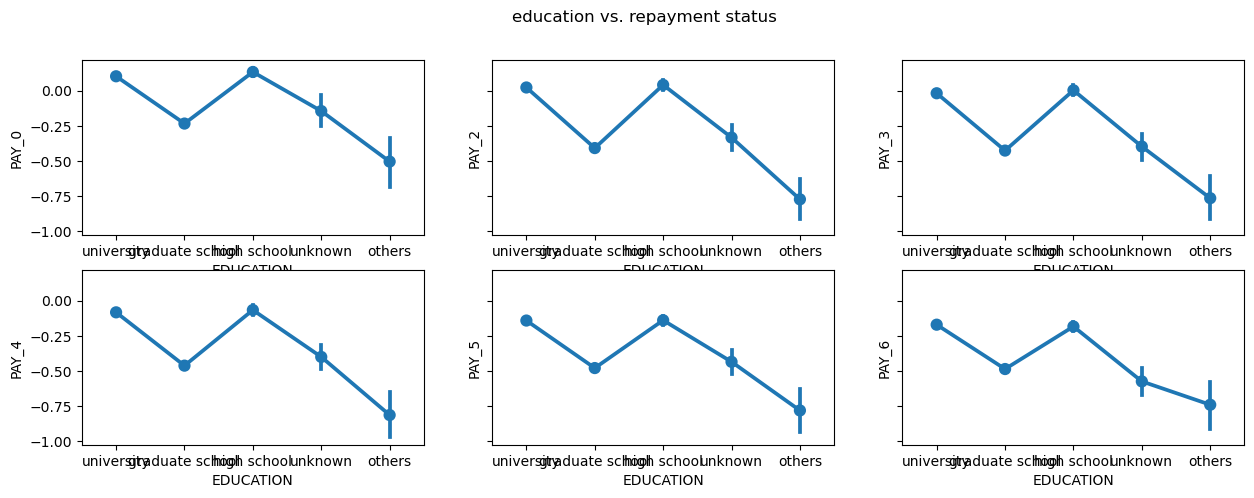

In [47]:
fig, axes = plt.subplots(2, 3, figsize=(15, 5), sharey=True)
fig.suptitle('education vs. repayment status')
plt.subplot(2,3,1)
sns.pointplot(x=df1["EDUCATION"],y=df1["PAY_0"])
plt.subplot(2,3,2)
sns.pointplot(x=df1["EDUCATION"],y=df1["PAY_2"])
plt.subplot(2,3,3)
sns.pointplot(x=df1["EDUCATION"],y=df1["PAY_3"])
plt.subplot(2,3,4)
sns.pointplot(x=df1["EDUCATION"],y=df1["PAY_4"])
plt.subplot(2,3,5)
sns.pointplot(x=df1["EDUCATION"],y=df1["PAY_5"])
plt.subplot(2,3,6)
sns.pointplot(x=df1["EDUCATION"],y=df1["PAY_6"])

In [107]:
df9=df1.drop(columns = ['ID', 'SEX', 'EDUCATION','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','default payment next month'])
df9

,LIMIT_BAL,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
1,20000,married,2,2,-1,-1,-2,-2
2,120000,single,-1,2,0,0,0,2
3,90000,single,0,0,0,0,0,0
4,50000,married,0,0,0,0,0,0
5,50000,married,-1,0,-1,0,0,0
...,...,...,...,...,...,...,...,...
29996,220000,married,0,0,0,0,0,0
29997,150000,single,-1,-1,-1,-1,0,0
29998,30000,single,4,3,2,-1,0,0
29999,80000,married,1,-1,0,0,0,-1


<AxesSubplot:xlabel='MARRIAGE', ylabel='PAY_6'>

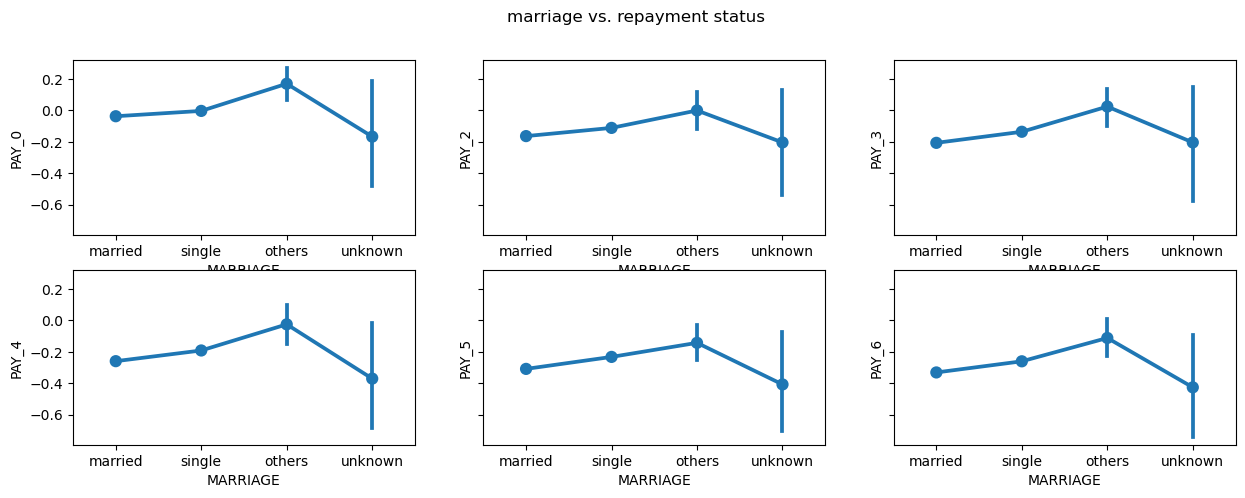

In [48]:
fig, axes = plt.subplots(2, 3, figsize=(15, 5), sharey=True)
fig.suptitle('marriage vs. repayment status')
plt.subplot(2,3,1)
sns.pointplot(x=df1["MARRIAGE"],y=df1["PAY_0"])
plt.subplot(2,3,2)
sns.pointplot(x=df1["MARRIAGE"],y=df1["PAY_2"])
plt.subplot(2,3,3)
sns.pointplot(x=df1["MARRIAGE"],y=df1["PAY_3"])
plt.subplot(2,3,4)
sns.pointplot(x=df1["MARRIAGE"],y=df1["PAY_4"])
plt.subplot(2,3,5)
sns.pointplot(x=df1["MARRIAGE"],y=df1["PAY_5"])
plt.subplot(2,3,6)
sns.pointplot(x=df1["MARRIAGE"],y=df1["PAY_6"])

In [112]:
df10=df1.drop(columns = ['ID', 'SEX', 'EDUCATION','MARRIAGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','default payment next month'])
df10

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
1,20000,24,2,2,-1,-1,-2,-2
2,120000,26,-1,2,0,0,0,2
3,90000,34,0,0,0,0,0,0
4,50000,37,0,0,0,0,0,0
5,50000,57,-1,0,-1,0,0,0
...,...,...,...,...,...,...,...,...
29996,220000,39,0,0,0,0,0,0
29997,150000,43,-1,-1,-1,-1,0,0
29998,30000,37,4,3,2,-1,0,0
29999,80000,41,1,-1,0,0,0,-1


<AxesSubplot:xlabel='AGE', ylabel='PAY_6'>

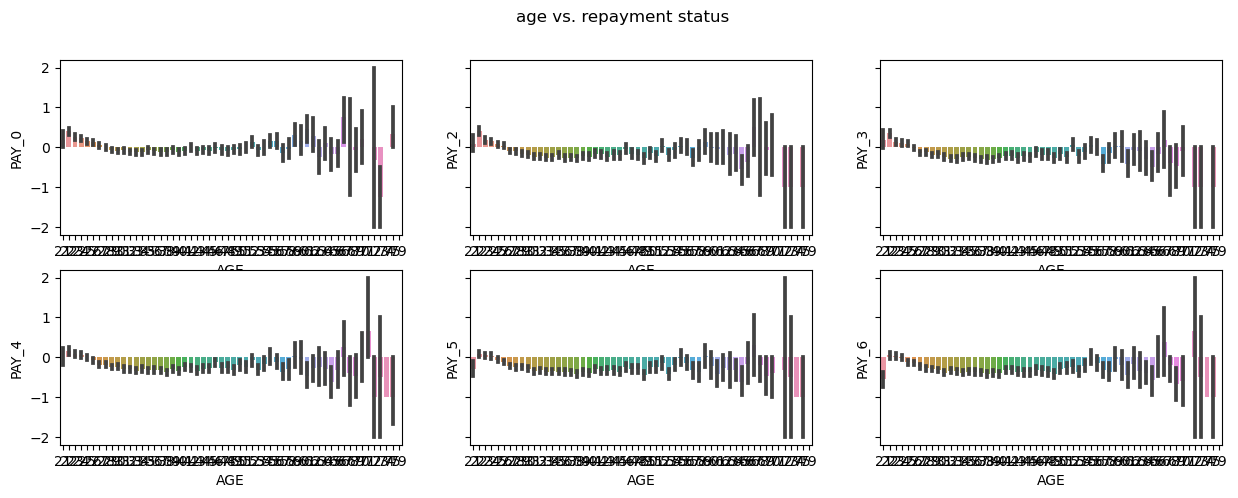

In [26]:
fig, axes = plt.subplots(2, 3, figsize=(15, 5), sharey=True)
fig.suptitle('age vs. repayment status')
plt.subplot(2,3,1)
sns.barplot(x=df1["AGE"],y=df1["PAY_0"])
plt.subplot(2,3,2)
sns.barplot(x=df1["AGE"],y=df1["PAY_2"])
plt.subplot(2,3,3)
sns.barplot(x=df1["AGE"],y=df1["PAY_3"])
plt.subplot(2,3,4)
sns.barplot(x=df1["AGE"],y=df1["PAY_4"])
plt.subplot(2,3,5)
sns.barplot(x=df1["AGE"],y=df1["PAY_5"])
plt.subplot(2,3,6)
sns.barplot(x=df1["AGE"],y=df1["PAY_6"])

<AxesSubplot:xlabel='AGE', ylabel='percentage6'>

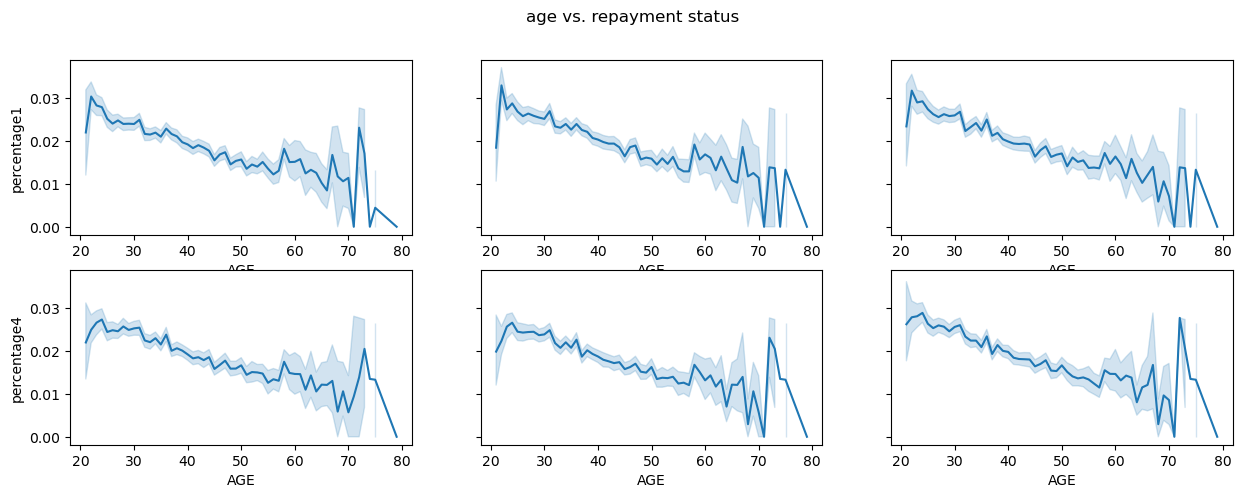

In [84]:
fig, axes = plt.subplots(2, 3, figsize=(15, 5), sharey=True)
fig.suptitle('age vs. repayment status')
plt.subplot(2,3,1)
sns.lineplot(x=df1["AGE"],y=df1["percentage1"])
plt.subplot(2,3,2)
sns.lineplot(x=df1["AGE"],y=df1["percentage2"])
plt.subplot(2,3,3)
sns.lineplot(x=df1["AGE"],y=df1["percentage3"])
plt.subplot(2,3,4)
sns.lineplot(x=df1["AGE"],y=df1["percentage4"])
plt.subplot(2,3,5)
sns.lineplot(x=df1["AGE"],y=df1["percentage5"])
plt.subplot(2,3,6)
sns.lineplot(x=df1["AGE"],y=df1["percentage6"])

In [29]:
df11=df1.drop(columns = ['ID','LIMIT_BAL','SEX','EDUCATION','AGE','MARRIAGE','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','default payment next month'])
df11

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
1,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0
2,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261
3,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549
4,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547
5,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131
...,...,...,...,...,...,...,...,...,...,...,...,...
29996,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980
29997,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0
29998,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357
29999,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944


<AxesSubplot:xlabel='PAY_6', ylabel='Topay6'>

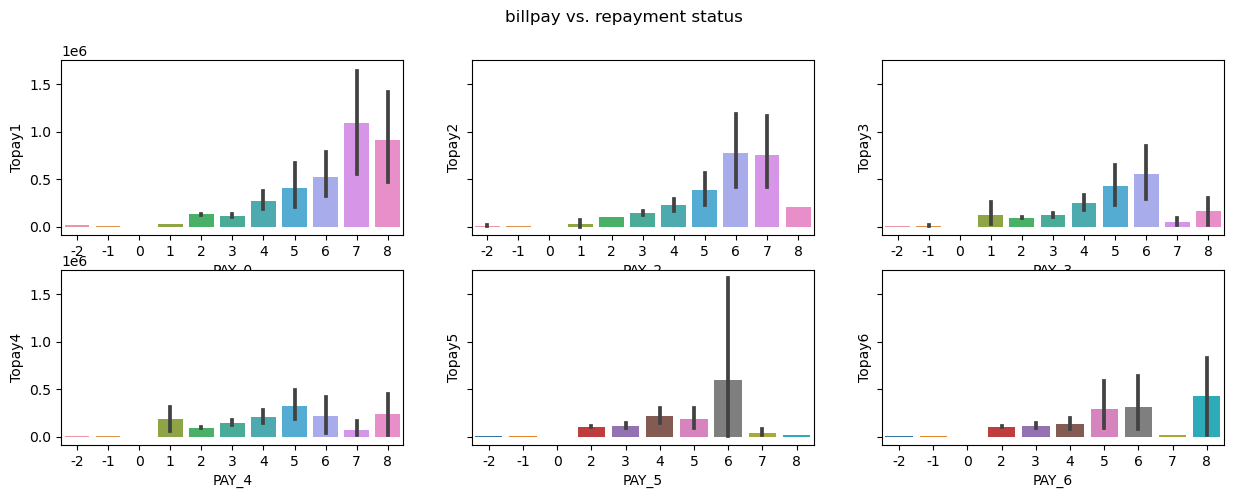

In [86]:
fig, axes = plt.subplots(2, 3, figsize=(15, 5), sharey=True)
fig.suptitle('billpay vs. repayment status')
plt.subplot(2,3,1)
sns.barplot(x=df1["PAY_0"],y=df1["Topay1"])
plt.subplot(2,3,2)
sns.barplot(x=df1["PAY_2"],y=df1["Topay2"])
plt.subplot(2,3,3)
sns.barplot(x=df1["PAY_3"],y=df1["Topay3"])
plt.subplot(2,3,4)
sns.barplot(x=df1["PAY_4"],y=df1["Topay4"])
plt.subplot(2,3,5)
sns.barplot(x=df1["PAY_5"],y=df1["Topay5"])
plt.subplot(2,3,6)
sns.barplot(x=df1["PAY_6"],y=df1["Topay6"])

<AxesSubplot:xlabel='PAY_6', ylabel='Topay6'>

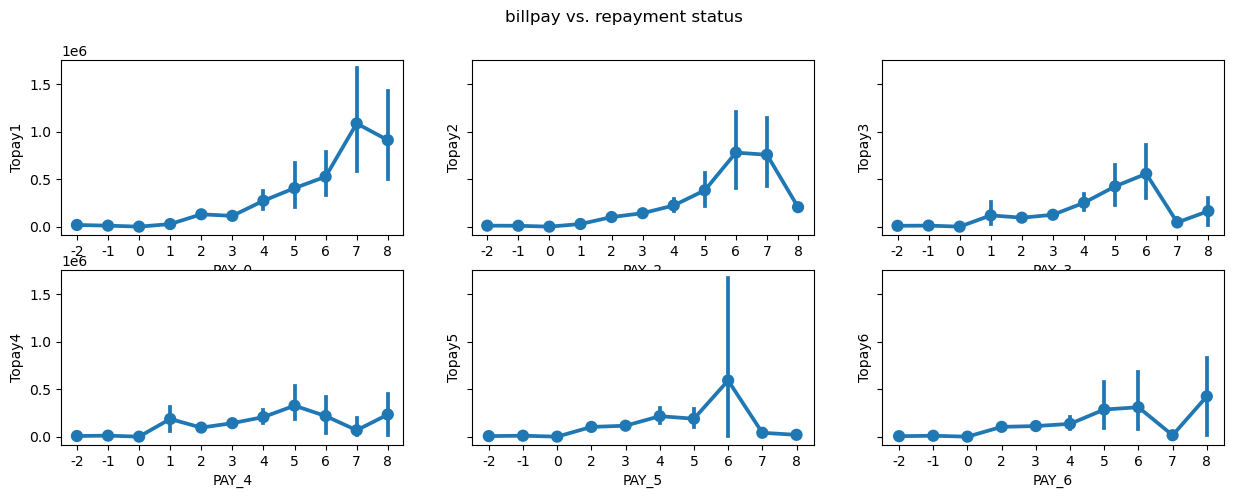

In [89]:
fig, axes = plt.subplots(2, 3, figsize=(15, 5), sharey=True)
fig.suptitle('billpay vs. repayment status')
plt.subplot(2,3,1)
sns.pointplot(x=df1["PAY_0"],y=df1["Topay1"])
plt.subplot(2,3,2)
sns.pointplot(x=df1["PAY_2"],y=df1["Topay2"])
plt.subplot(2,3,3)
sns.pointplot(x=df1["PAY_3"],y=df1["Topay3"])
plt.subplot(2,3,4)
sns.pointplot(x=df1["PAY_4"],y=df1["Topay4"])
plt.subplot(2,3,5)
sns.pointplot(x=df1["PAY_5"],y=df1["Topay5"])
plt.subplot(2,3,6)
sns.pointplot(x=df1["PAY_6"],y=df1["Topay6"])

In [71]:
def myfunction1():
    df12 =(pd.read_excel(io=r'../data/raw/default of credit card clients.xls')
    .drop("Unnamed: 0",axis=1)
    .iloc[1:]
    .rename(columns={"X1": "LIMIT_BAL","X2":"SEX","X3":'EDUCATION',"X4":"MARRIAGE","X5":"AGE","X6":"PAY_0",
       "X7":"PAY_2", "X8":"PAY_3","X9":"PAY_4", "X10":"PAY_5", "X11":"PAY_6","X12":"BILL_AMT1","X13": "BILL_AMT2",
       "X14":"BILL_AMT3","X15":"BILL_AMT4","X16":"BILL_AMT5","X17":"BILL_AMT6", "X18":"PAY_AMT1",
       "X19":"PAY_AMT2","X20":"PAY_AMT3", "X21":"PAY_AMT4","X22":"PAY_AMT5", "X23":"PAY_AMT6",
       "Y":"default payment next month"})
    .replace({'SEX':[1,2]},{'SEX':['male','female']})
    .replace({'default payment next month':[1,0]},{'default payment next month':['yes','no']})
    .replace({'MARRIAGE':[0,1,2,3]},{'MARRIAGE':['unknown','married','single','others']})
    .replace({'EDUCATION':[0,1,2,3,4,5,6]},{'EDUCATION':['unknown','graduate school','university','high school','others','unknown','unknown']}))
    df13= (df12.drop(columns = ['SEX', 'EDUCATION','MARRIAGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','default payment next month'])
       .sort_values("AGE", ascending=True)
       .assign(percentage0=lambda x: (x['AGE']/x['LIMIT_BAL'])))
    return df13

In [68]:
def myfunction2():
    df14= (df12.drop(columns = ['SEX', 'LIMIT_BAL','EDUCATION','MARRIAGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','default payment next month'])
       .sort_values("AGE", ascending=True)
       .assign(percentage1=lambda x:(abs(x['PAY_0'])/x['AGE']))
       .assign(percentage2=lambda x:(abs(x['PAY_2'])/x['AGE']))
       .assign(percentage3=lambda x:(abs(x['PAY_3'])/x['AGE']))
       .assign(percentage4=lambda x:(abs(x['PAY_4'])/x['AGE']))
       .assign(percentage5=lambda x:(abs(x['PAY_5'])/x['AGE']))
       .assign(percentage6=lambda x:(abs(x['PAY_6'])/x['AGE'])))
    return df14

In [69]:
def myfunction3():
    df14= (df12.drop(columns = ['SEX','AGE','LIMIT_BAL','EDUCATION','MARRIAGE','default payment next month'])
       .assign(Topay1=lambda x:(abs(x['PAY_0'])*x['BILL_AMT1']))
       .assign(Topay2=lambda x:(abs(x['PAY_2'])*x['BILL_AMT2']))
       .assign(Topay3=lambda x:(abs(x['PAY_3'])*x['BILL_AMT3']))
       .assign(Topay4=lambda x:(abs(x['PAY_4'])*x['BILL_AMT4']))
       .assign(Topay5=lambda x:(abs(x['PAY_5'])*x['BILL_AMT5']))
       .assign(Topay6=lambda x:(abs(x['PAY_6'])*x['BILL_AMT6'])))
    return df14

In [70]:
import sys
sys.path.append('./code')
import project_function_Shirley as pf
df1= pf. myfunction1('../data/raw/default of credit card clients.xls')
df2= pf. myfunction2('../data/raw/default of credit card clients.xls')
df3= pf. myfunction3('../data/raw/default of credit card clients.xls')

TypeError: myfunction1() takes 0 positional arguments but 1 was given